# Lending club case study
## High level approach 
- Understand the data 
- Import the data and analyse the data 
- Perform data clean up 
- Univariate analysis 
- Observations
- BiVariate analysis 
- Observations

In [175]:
# Importing all the python libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
# Load the csv file from disk
loan = pd.read_csv('loan.csv', low_memory=False)

In [177]:
## Describe and have a high level view of dataframe loaded 
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data clean up 

### We will not need all columns which has only NAN value as it is does not have impact on the analysis

In [178]:
# drop all columns with NAN values 
loan.dropna(axis=1, how='all', inplace=True)

### We are not done yet, we will be further looking at other columns with more proportion of NAN value and try to eliminiate them

#### Further looking at the other columns we will try to understand if we have same values across the columns and eliminate such columns 

In [179]:
# Converting the object type to String to check unique values in the column
loan.pymnt_plan = loan['pymnt_plan'].astype('string')

In [180]:
# using unique to check value sets present in the column 
loan.pymnt_plan.unique()

<StringArray>
['n']
Length: 1, dtype: string

In [181]:
# using unique to check value sets present in the column 
loan.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

In [182]:
# using unique to check value sets present in the column 
loan.delinq_amnt.unique()

array([0], dtype=int64)

In [183]:
# using unique to check value sets present in the column 
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [184]:
# using unique to check value sets present in the column 
loan.acc_now_delinq.unique()

array([0], dtype=int64)

In [185]:
# using unique to check value sets present in the column 
loan.policy_code.unique()

array([1], dtype=int64)

In [186]:
# using unique to check value sets present in the column 
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [187]:
# pub_rec_bankruptcies has predominantly zeroes and hence we can eliminate that coulumn too 
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [188]:
# only 2% of ros only has next scheduled date value hence we can eliminate this too 
loan.next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [189]:
# There is no charge off within 12 months 
loan.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [190]:
# unique policy code across dataframe
loan.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [191]:
# pub_rec is predominantly filled in by zeroes hence we can eliminate
loan.pub_rec.value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [192]:
loan.recoveries.value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

In [193]:
# title consists of random values
loan.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [194]:
# majority are zeroes hence we can eliminate this column
loan.total_rec_late_fee.value_counts()

0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
35.286832        1
15.000000        1
14.777500        1
14.967774        1
19.890000        1
Name: total_rec_late_fee, Length: 1356, dtype: int64

In [195]:
# we can eliminate as this is a unique url for the loan id which we already has in id column 
loan.url.value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

In [196]:
# This is a public data hence we can eliminate this coulmn
loan.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

In [197]:
# Dropping the above analysed column and the reason is mentioned in the respective code block itself for clarity
loan.drop(['pymnt_plan', 'application_type', 'delinq_amnt', 'chargeoff_within_12_mths', 
         'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'tax_liens', 'initial_list_status', 
         'pub_rec_bankruptcies', 'next_pymnt_d', 'chargeoff_within_12_mths', 'policy_code', 'pub_rec',
         'recoveries', 'title', 'total_rec_late_fee', 'url', 'zip_code', 'desc'], 
         axis=1, inplace=True)

### Standardising numbers
#### There could be data which is is eligible to be a number but marked as object columns due to numerical representations such as percentage %, greater > , lesser <, etc.. 
#### we will try to look up such data and try to correct them into number format

In [198]:
# Replace all % values in interest rate columns and convert it to float type
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '')))

In [199]:
def extractnumber(emp_len):
       if '<' in emp_len:
        return '0'
       elif '+' in emp_len:
        return emp_len.split('+')[0]
       else:
        return emp_len.split()[0]

loan['emp_length'].fillna(loan['emp_length'].mode()[0], inplace=True)      
loan["emp_length"] = loan["emp_length"].astype(str)
loan["emp_length"] = loan["emp_length"].apply(extractnumber)
loan["emp_length"] = pd.to_numeric(loan["emp_length"])

In [200]:
loan["emp_length"].value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [201]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [202]:
loan = loan[loan['loan_status'] != 'Current']

In [203]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [204]:
#converting grade and subgrade column to string
loan['grade'] = loan['grade'].astype('string')
loan['sub_grade'] = loan['sub_grade'].astype('string')

In [205]:
#Analysing the GRADE and SUBGRADE column
loan.apply(lambda x : True if x['grade'] == x['sub_grade'][0] else False,axis=1).value_counts()

True    38577
dtype: int64

In [206]:
#The grade is added as a first character in subgrade
#loan['grade_and_subgrade'].value_counts()

In [207]:
#The grade is added as a first character in subgrade
#loan['grade_and_subgrade'].value_counts()

In [208]:
#Hence removing the first character of sub_grade 
loan['sub_grade'] = loan['sub_grade'].apply(lambda x : x[1] if len(x) > 1 else x)

In [209]:
loan['sub_grade']

0        2
1        4
2        5
3        1
5        4
        ..
39712    4
39713    1
39714    4
39715    2
39716    2
Name: sub_grade, Length: 38577, dtype: object

In [210]:
#Analysing mths_since_last_delinq column 
loan.mths_since_last_delinq.isna().sum()

24905

In [211]:
#Analysing mths_since_last_record column 
loan.mths_since_last_record.isna().sum()

35837

In [212]:
#Droping mths_since_last_delinq, mths_since_last_record columns since they have NA columns more 50% of the rows
loan.drop(columns=['mths_since_last_delinq', 'mths_since_last_record'],inplace = True )

In [213]:
#removing the % in revol_util field at end
loan.revol_util = loan.revol_util.astype('string')
loan.revol_util = loan.revol_util.apply(lambda x: float(x[:-1]) if not pd.isna(x) else x)

In [214]:
print("Mode :" + str(loan.revol_util.mode())[0])
print("Mean :" + str(loan.revol_util.mean()))
loan.revol_util.value_counts()

Mode :0
Mean :48.70277675396472


0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

In [215]:
#Analysing above mean and mode values. We could infer that the mode 0.00 is be repeated more than mean value.
loan.revol_util.fillna(loan.revol_util.mode()[0],inplace=True)

In [216]:
# Employee title column analysis
len(pd.unique(loan.emp_title))

28028

In [217]:
loan.drop('emp_title', axis=1, inplace=True)

In [218]:
loan.isna().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
collection_recovery_fee     0
last_pymnt

In [219]:
loan.drop('last_pymnt_d', axis=1, inplace=True)

In [220]:
loan.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
collection_recovery_fee    0
last_pymnt_amnt            0
last_credit_pu

In [221]:
# As data dictionary states this date does not signifies <The most recent month LC pulled credit for this loan> anything about loan eligibility 
# Hence we can remove column last_credit_pull_d
loan.drop('last_credit_pull_d', axis=1, inplace=True)

In [222]:
loan.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

# Univariate analysis

### Unordered categorical
#### Frequency Chart for loan status variable

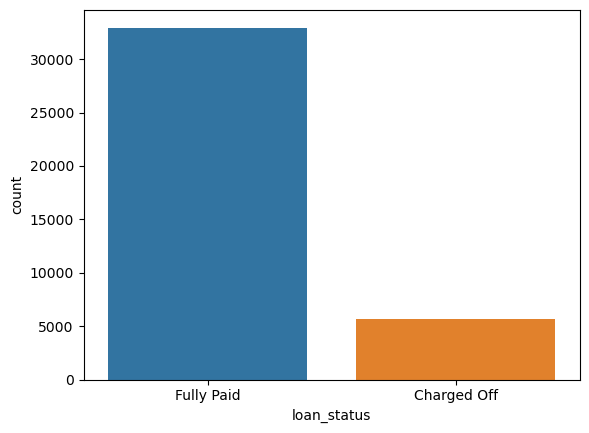

In [223]:
# loan['loan_status'].value_counts().plot.bar()
plt.style.use('default')
sns.countplot(x = 'loan_status', data = loan)
plt.show()

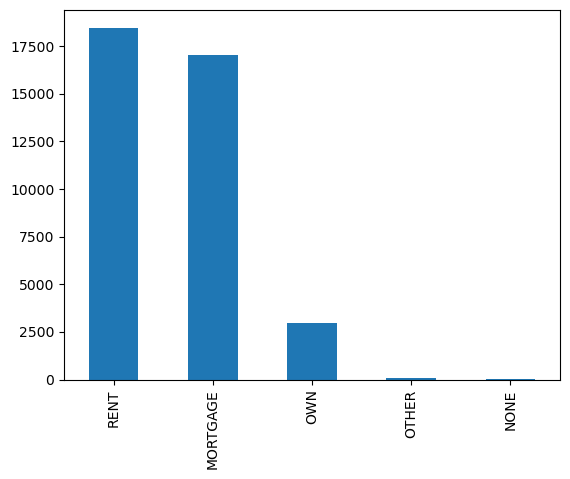

In [224]:
loan['home_ownership'].value_counts().plot.bar()
plt.show()

### Ordered categorical
#### Employee length of working years will be in order from 0 to 10 hence understanding the frequency would give us some insights of loan candidates

C:\Users\sivaskandan\AppData\Local\Temp\ipykernel_16564\363084216.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # nice and clean grid


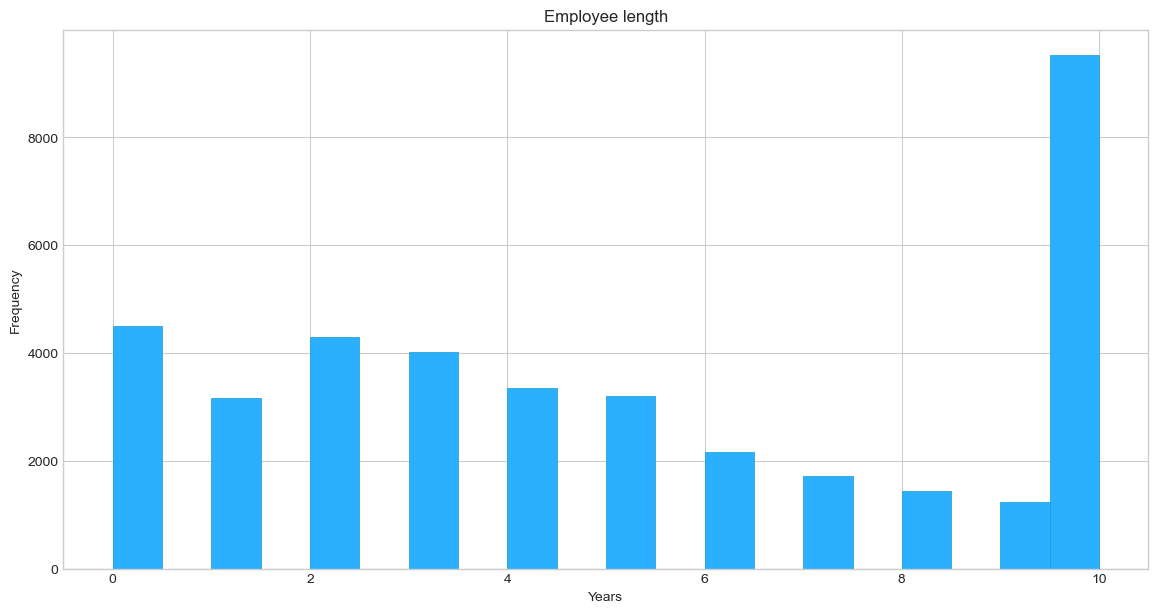

In [225]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(loan['emp_length'],bins=20, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Employee length') 
plt.xlabel('Years') 
plt.ylabel('Frequency') 
plt.show()
plt.style.use('default')

### Quantitative variables

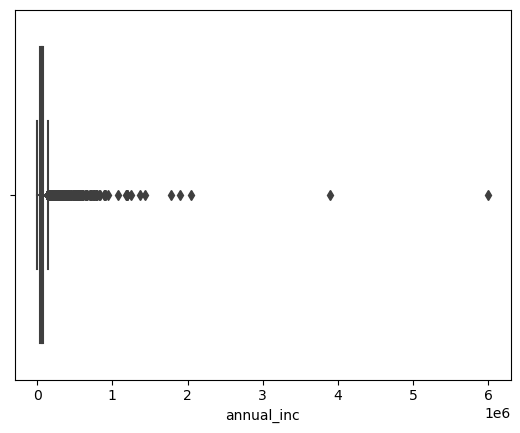

In [226]:
#Create a box plot for the price column
sns.boxplot(data=loan, x='annual_inc')
plt.show()

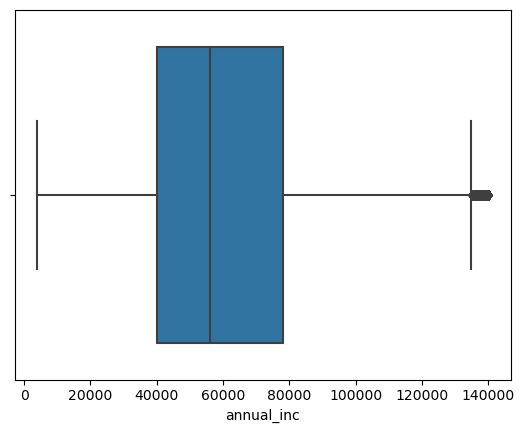

In [227]:
loan = loan[loan['annual_inc'] <= loan['annual_inc'].quantile(0.95)]
sns.boxplot(data=loan, x='annual_inc')
plt.show()

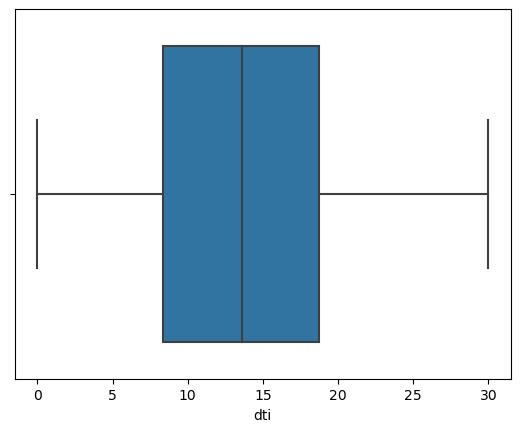

In [228]:
sns.boxplot(data=loan, x='dti')
plt.show()

#### Deriving variables from existing columns 

In [229]:
loan['issue_month'] = loan.issue_d.apply(lambda x: x.split('-')[0])
loan['issue_year'] = loan.issue_d.apply(lambda x: '20' + x.split('-')[1])

Text(0.5, 1.0, 'year vs month')

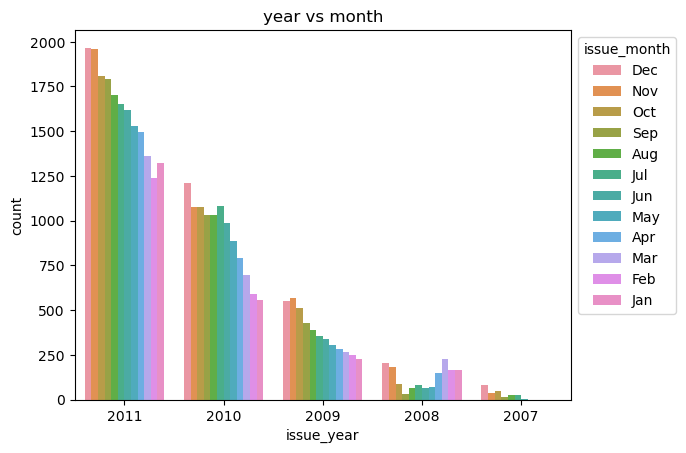

In [230]:
ax = sns.countplot(x='issue_year', hue='issue_month', data=loan)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("year vs month")

In [231]:
loan.annual_inc.value_counts()

60000.00    1466
50000.00    1029
40000.00     855
45000.00     811
30000.00     808
            ... 
52518.72       1
42204.00       1
47232.00       1
9960.00        1
27376.00       1
Name: annual_inc, Length: 4789, dtype: int64

C:\Users\sivaskandan\AppData\Local\Temp\ipykernel_16564\2136799528.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


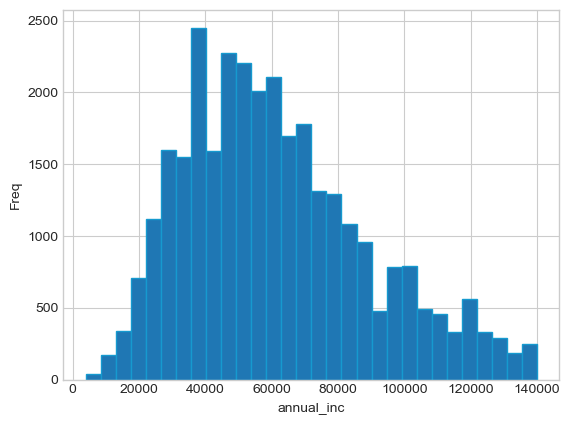

In [232]:
plt.style.use('seaborn-whitegrid')
plt.hist(loan.annual_inc[loan['loan_status']=="Fully Paid"], edgecolor='#169acf',bins = 30)
plt.xlabel("annual_inc")
plt.ylabel("Freq")
plt.show()

<AxesSubplot: xlabel='grade', ylabel='count'>

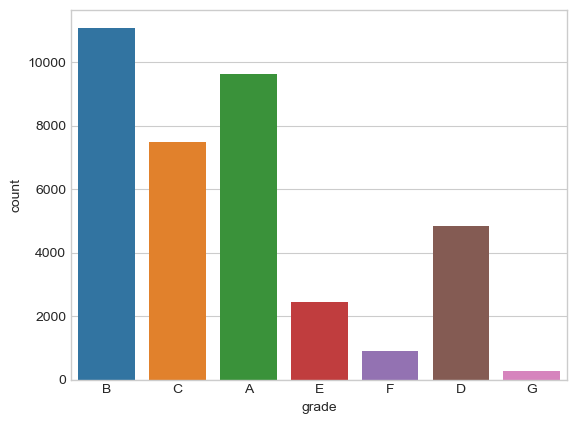

In [233]:
sns.countplot(data=loan,x="grade")

In [234]:
loan.sub_grade.value_counts()

4    7685
3    7553
5    7441
2    7268
1    6707
Name: sub_grade, dtype: int64

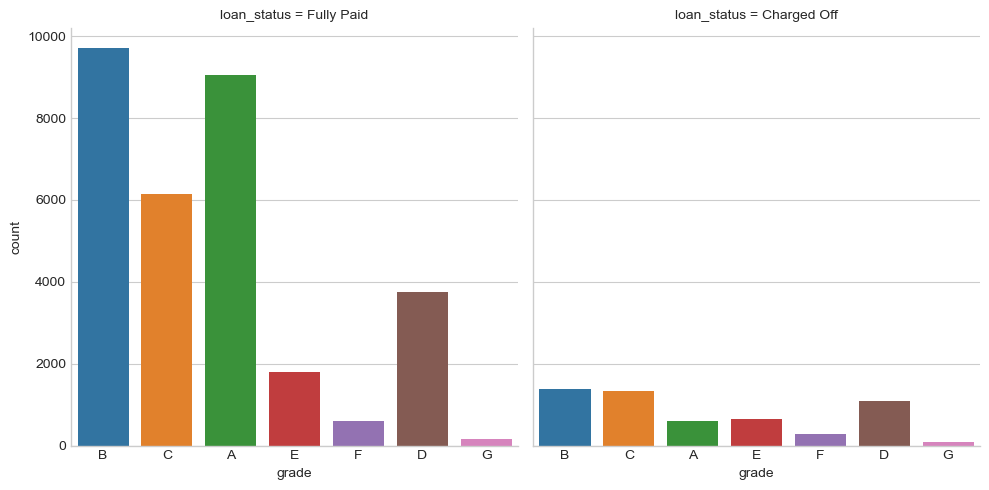

In [235]:
sns.catplot(data=loan,x='grade',col='loan_status', kind='count')

<AxesSubplot: xlabel='grade'>

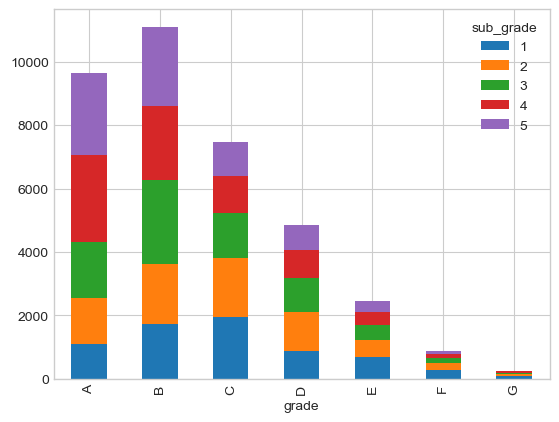

In [279]:
grd = pd.crosstab(loan['grade'],loan['sub_grade'])
grd.plot(kind='bar',stacked = True)

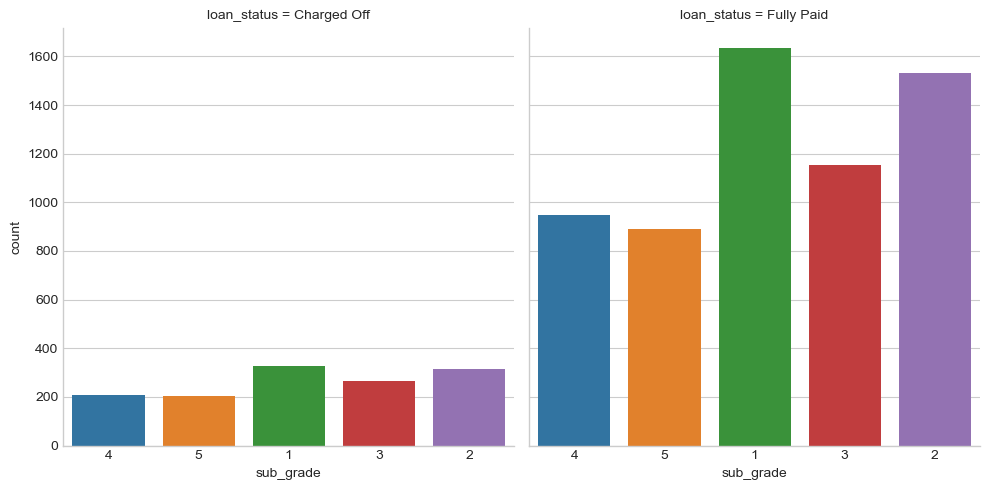

In [237]:
sns.catplot(data=loan[loan['grade']=='C'],x='sub_grade',col='loan_status', kind='count')

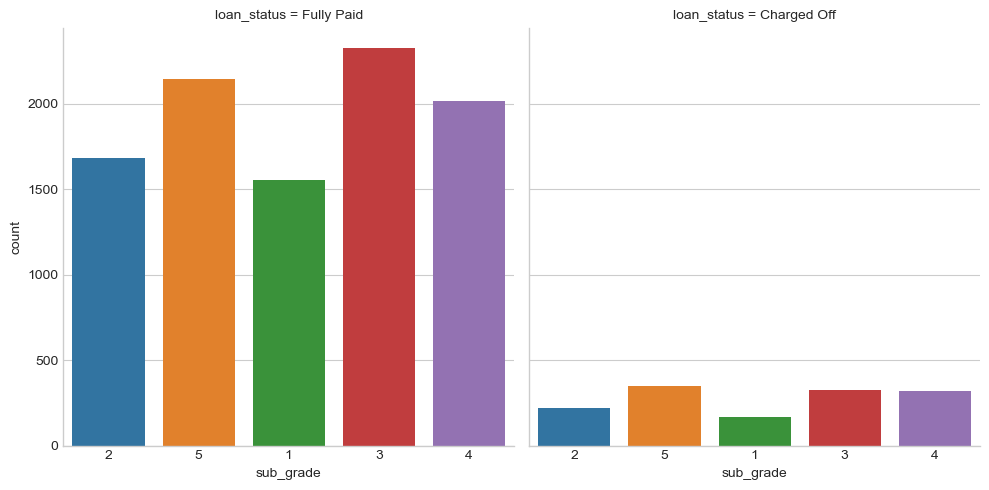

In [281]:
sns.catplot(data=loan[loan['grade']=='B'],x='sub_grade',col='loan_status', kind='count')

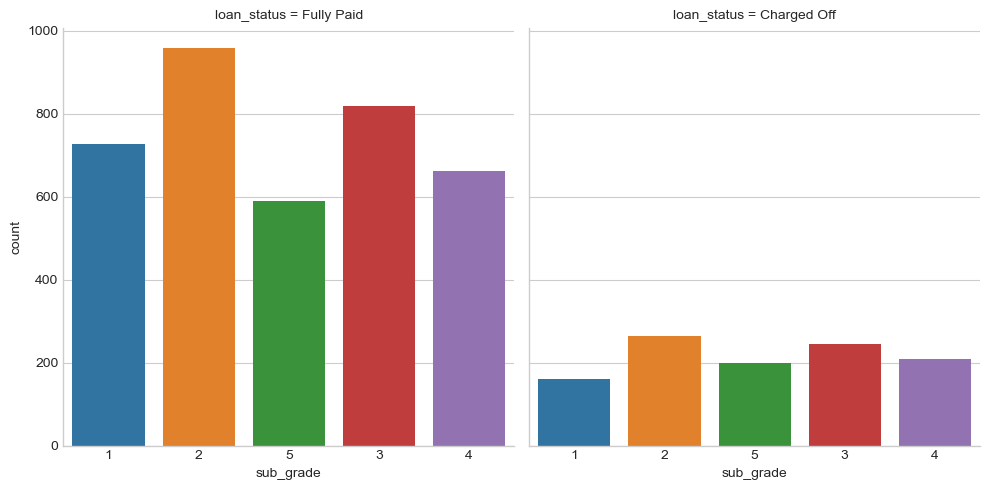

In [239]:
sns.catplot(data=loan[loan['grade']=='D'],x='sub_grade',col='loan_status', kind='count')

In [240]:
loan.verification_status

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
5        Source Verified
              ...       
39711       Not Verified
39712       Not Verified
39713       Not Verified
39714       Not Verified
39716       Not Verified
Name: verification_status, Length: 36654, dtype: object

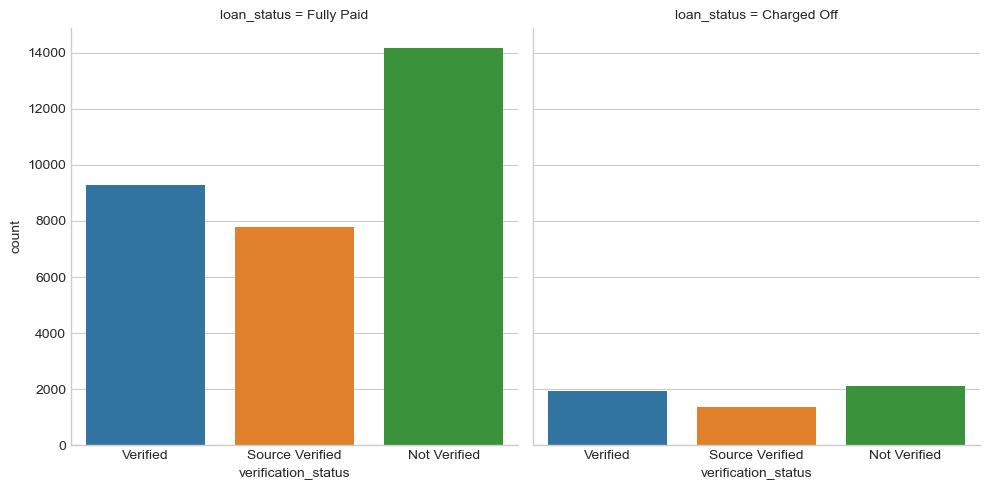

In [241]:
sns.catplot(data=loan,x='verification_status',col='loan_status', kind='count')

In [242]:
loan.purpose.value_counts()

debt_consolidation    17305
credit_card            4783
other                  3699
home_improvement       2556
major_purchase         2046
small_business         1623
car                    1448
wedding                 893
medical                 641
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: purpose, dtype: int64

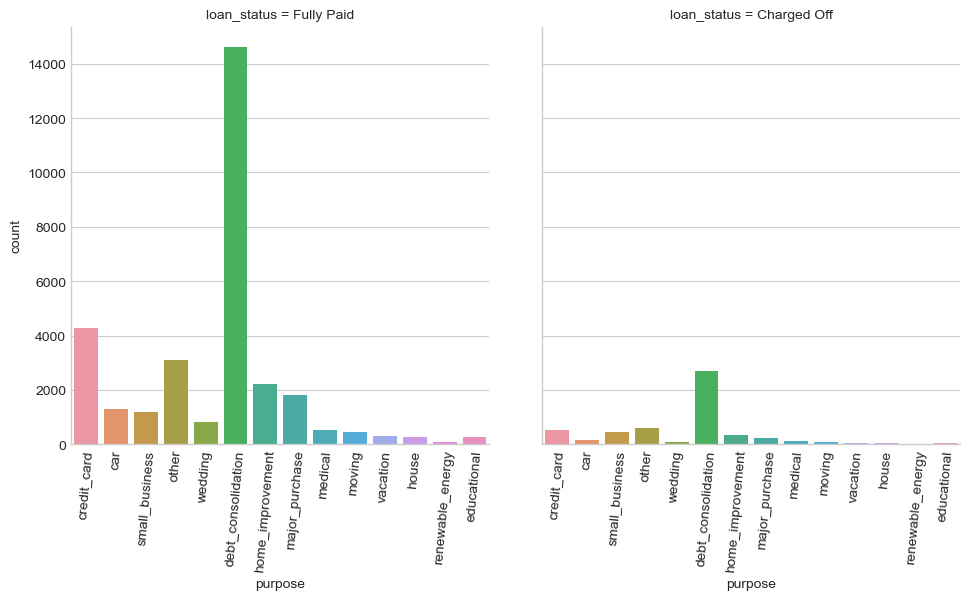

In [243]:
plot = sns.catplot(data=loan,x='purpose',col='loan_status', kind='count',aspect=1)
plot.set_xticklabels(rotation=85)

{'whiskers': [<matplotlib.lines.Line2D at 0x21b4a951a90>,
 'caps': [<matplotlib.lines.Line2D at 0x21b4a951fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b4a9517f0>],
 'medians': [<matplotlib.lines.Line2D at 0x21b4345b550>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b4345b7f0>],
 'means': []}

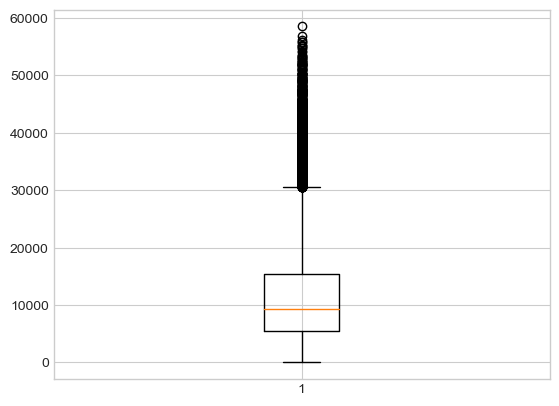

In [244]:
plt.boxplot(loan.total_pymnt)

In [245]:
#splitting in to 4 groups
def pymn_spt(x):
    if x < 15000 :
        return 15
    elif x < 30000 :
        return 30
    elif x < 45000 :
        return 45
    elif x < 60000 :
        return 60

In [246]:
loan['pymn_spl'] = loan.total_pymnt.apply(lambda x : pymn_spt(x))

In [247]:
loan.pymn_spl.value_counts()

15    27041
30     8171
45     1301
60      141
Name: pymn_spl, dtype: int64

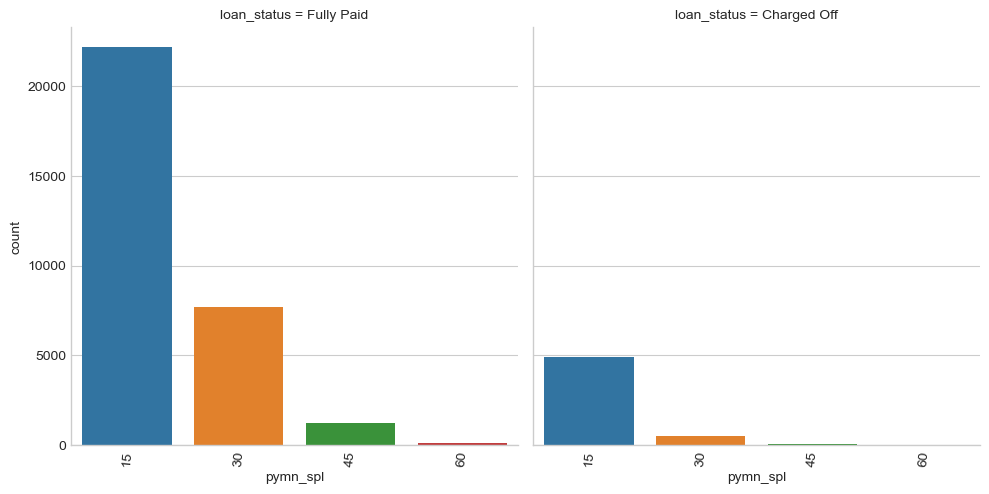

In [248]:
plot = sns.catplot(data=loan,x='pymn_spl',col='loan_status', kind='count',aspect=1)
plot.set_xticklabels(rotation=85)

In [249]:
loan.loan_amnt.max()

35000

In [250]:
#splitting in to 4 groups
def pymn_spt2(x):
    if x < 10000 :
        return 10
    elif x < 20000 :
        return 20
    elif x < 30000 :
        return 30
    elif x > 30000 :
        return 40

In [262]:
loan['loan_amnt_spl'] = loan.loan_amnt.apply(lambda x : pymn_spt2(x))

In [263]:
loan.loan_amnt_spl.value_counts()

10.0    19056
20.0    12685
30.0     4113
40.0      539
Name: loan_amnt_spl, dtype: int64

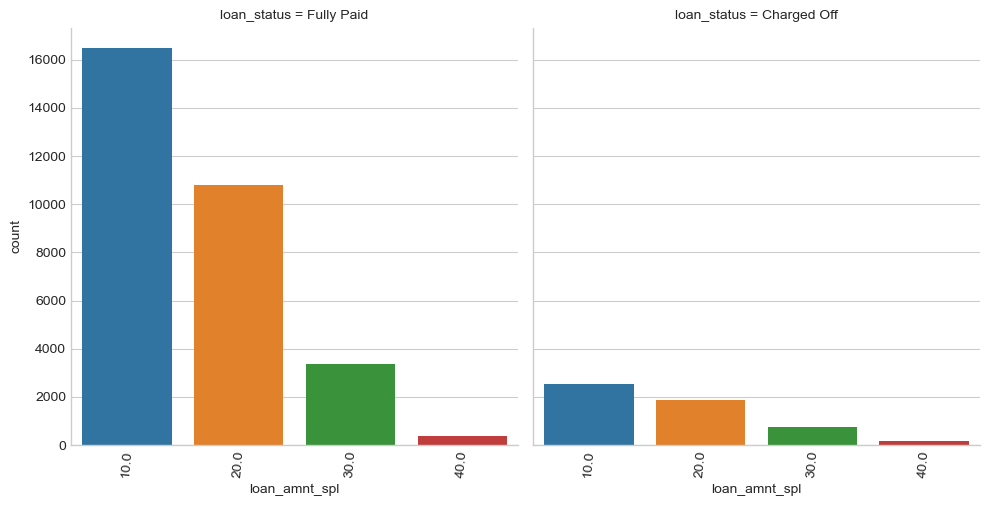

In [264]:
plot = sns.catplot(data=loan,x='loan_amnt_spl',col='loan_status', kind='count',aspect=1)
plot.set_xticklabels(rotation=85)

In [254]:
#loan.corr()

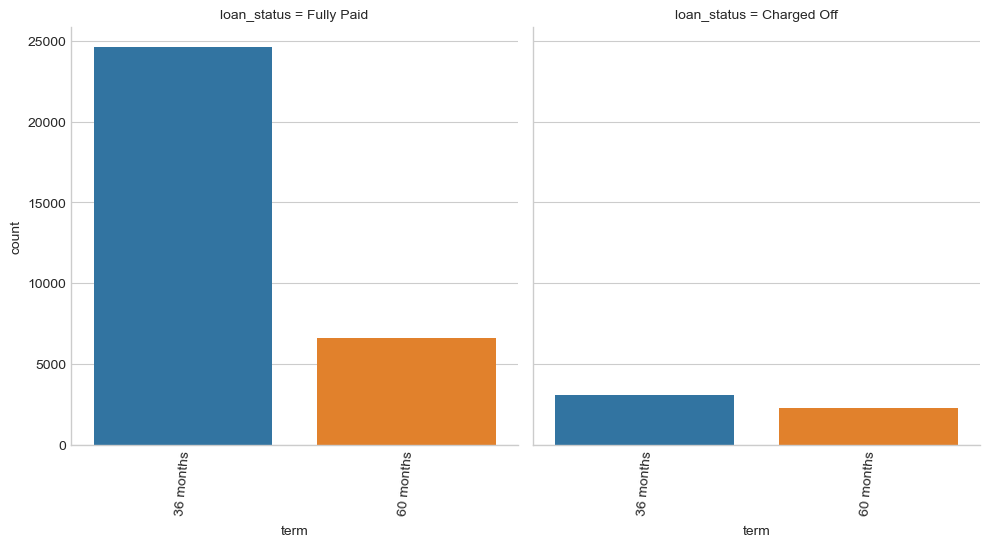

In [255]:
loan.term
plot = sns.catplot(data=loan,x='term',col='loan_status', kind='count',aspect=1)
plot.set_xticklabels(rotation=85)


{'whiskers': [<matplotlib.lines.Line2D at 0x21b4ace8b20>,
 'caps': [<matplotlib.lines.Line2D at 0x21b456614c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b4ace8880>],
 'medians': [<matplotlib.lines.Line2D at 0x21b4acd14c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b4acd1760>],
 'means': []}

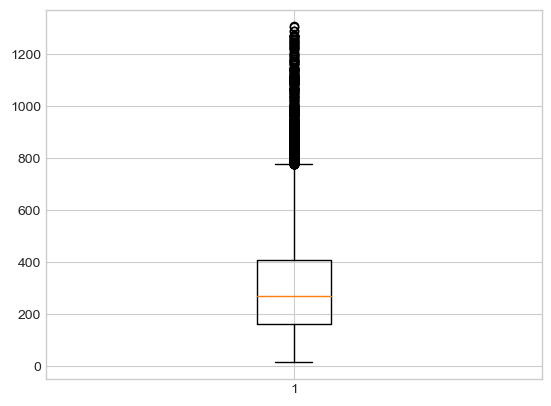

In [256]:
loan.installment.min()

plt.boxplot(loan.installment)

In [257]:
loan.installment.max()

1305.19

In [268]:
#splitting in to 4 groups

def pymn_spt3(x):
    if x < 400 :
        return 40
    elif x < 800 :
        return 80
    elif x < 1200 :
        return 120
    elif x > 1600 :
        return 160

In [269]:
loan['installment_spl'] = loan.installment.apply(lambda x : pymn_spt3(x))

In [270]:
loan.installment_spl.value_counts()

40.0     27049
80.0      8415
120.0     1156
Name: installment_spl, dtype: int64

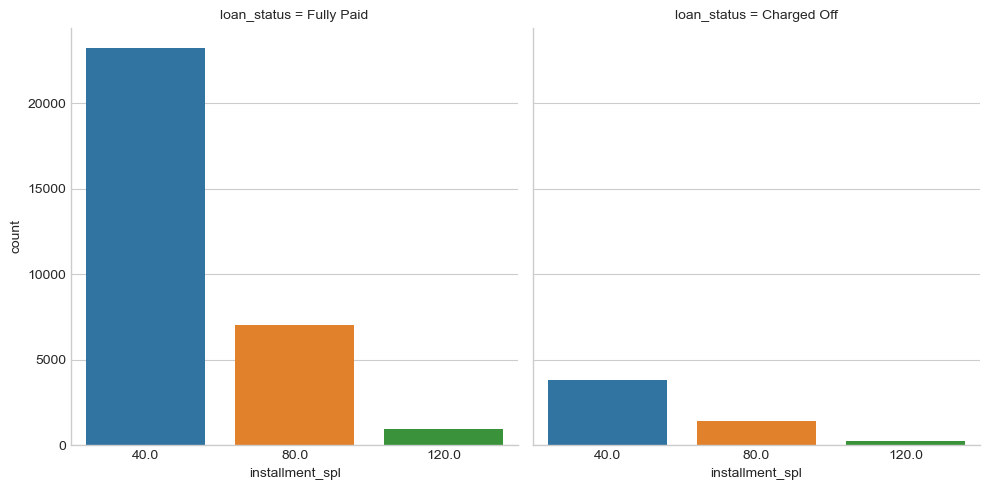

In [271]:
plot = sns.catplot(data=loan,x='installment_spl',col='loan_status', kind='count',aspect=1)

In [274]:
loan.emp_length.value_counts()

10    8902
0     4327
2     4101
3     3824
4     3200
5     3044
1     3043
6     2073
7     1644
8     1343
9     1153
Name: emp_length, dtype: int64

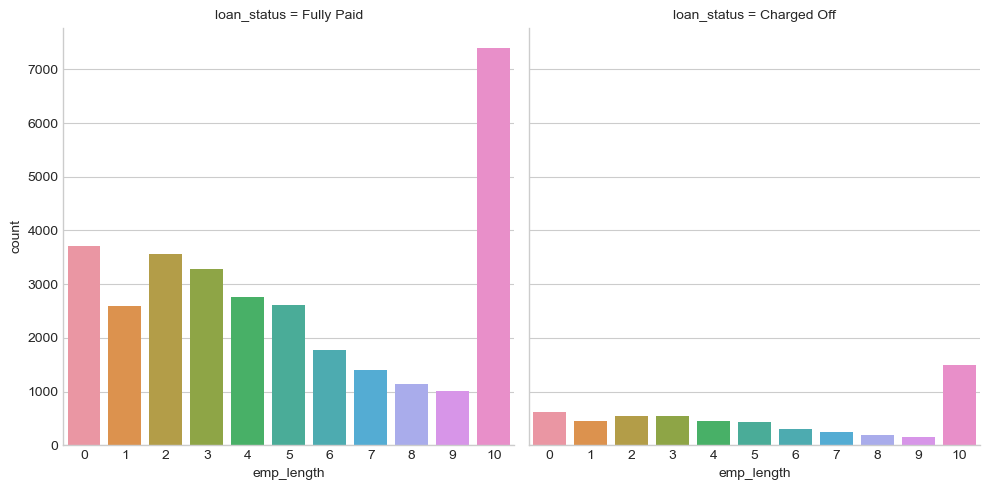

In [275]:
plot = sns.catplot(data=loan,x='emp_length',col='loan_status', kind='count',aspect=1)

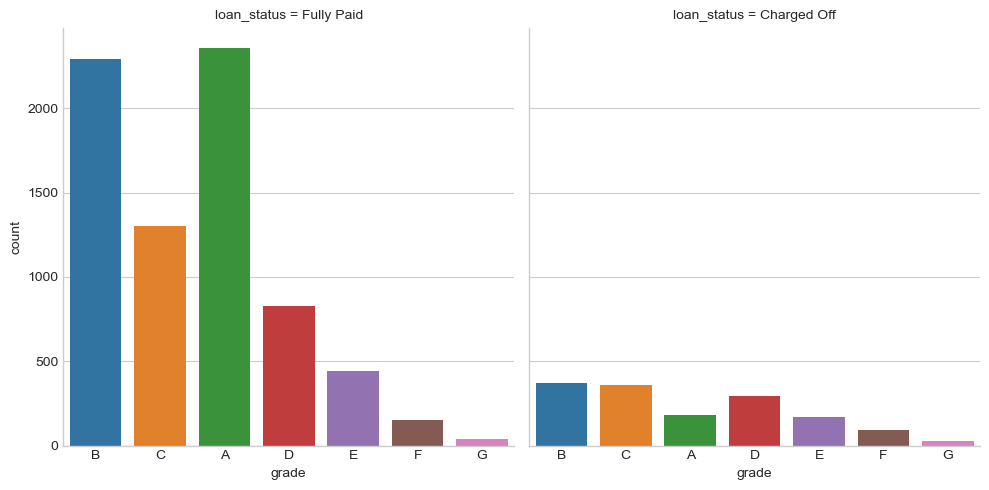

In [277]:
#multivariate analysis
plot = sns.catplot(data=loan[loan['emp_length']==10],x='grade',col='loan_status', kind='count',aspect=1)